Saving H-7258 Alen (1).jpg to H-7258 Alen (1).jpg


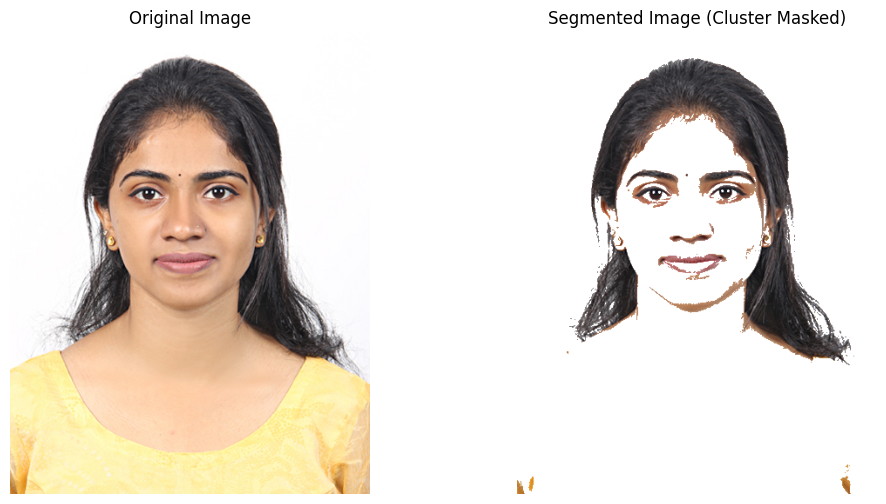

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload image in Colab
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Apply K-Means segmentation
def kmeans_segmentation(image_path, k=2, mask_cluster=0, mask_color=(255, 255, 255)):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Flatten image to (num_pixels, 3)
    pixel_values = img_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Apply K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixel_values)

    # Mask selected cluster
    segmented_pixels = pixel_values.copy()
    segmented_pixels[labels == mask_cluster] = mask_color

    # Reshape back to original dimensions
    segmented_image = segmented_pixels.reshape(img_rgb.shape).astype(np.uint8)

    return img_rgb, segmented_image

# Step 3: Run segmentation
original_img, segmented_img = kmeans_segmentation(image_path, k=2, mask_cluster=0)

# Step 4: Display results
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(segmented_img)
plt.title("Segmented Image (Cluster Masked)")
plt.axis("off")

plt.show()
